# Testing hypotheses with $t$-tests

- explore the data set
- formulate the hypotheses
- conduct a $t$-test using Python.

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the ab_test.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/ab_test.csv"

# Load the data set by specifying the url.
data = pd.read_csv(url)

# View the DataFrame.
data.head()

,Unnamed: 0,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,0,1,control,old,6.554592,0,Spanish
1,1,2,control,old,5.620046,0,Spanish
2,2,3,control,old,7.684967,1,Spanish
3,3,4,treatment,new,4.228134,1,French
4,4,5,control,old,5.959690,0,Spanish


In [ ]:
# Drop the 'Unnamed: 0' column – redundant index.
data.drop(columns=['Unnamed: 0'],
          inplace=True)

# View the first 10 rows of the DataFrame.
print(data.shape)
data.head(10)

(1000, 6)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,1,control,old,6.554592,0,Spanish
1,2,control,old,5.620046,0,Spanish
2,3,control,old,7.684967,1,Spanish
3,4,treatment,new,4.228134,1,French
4,5,control,old,5.959690,0,Spanish
5,6,control,old,5.207311,0,Spanish
6,7,control,old,5.730399,0,English
7,8,treatment,new,6.294815,0,Spanish
8,9,control,old,6.441502,0,Spanish
9,10,control,old,6.808718,0,French


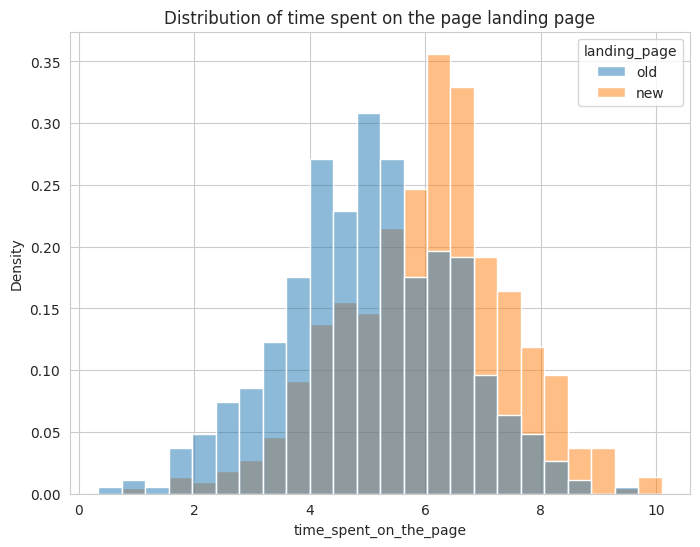

In [ ]:
# Exploratory data analysis.
# Create three plots: histogram, countplot, and boxplot.
# Set the style of Seaborn for better visualisation.
sns.set_style("whitegrid")

# a) Create the histogram.
# Distribution of time spent on the page.
plt.figure(figsize=(8, 6))
sns.histplot(data=data,
             x='time_spent_on_the_page',
             hue='landing_page',
             stat='density',
             common_norm=False)

plt.title('Distribution of time spent on the page landing page')
plt.show()

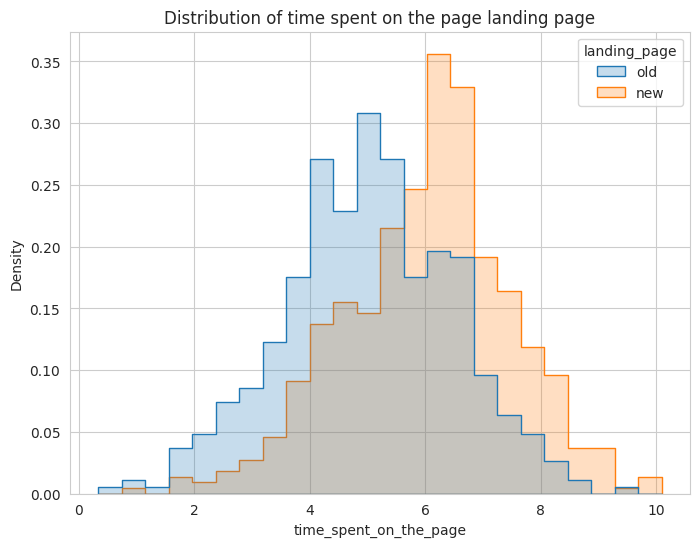

In [ ]:
# Exploratory data analysis.
# Create three plots: histogram, countplot, and boxplot.
# Set the style of Seaborn for better visualisation.
sns.set_style("whitegrid")

# a) Create the histogram.
# Distribution of time spent on the page.
plt.figure(figsize=(8, 6))
sns.histplot(data=data,
             x='time_spent_on_the_page',
             hue='landing_page',
             element='step',
             stat='density',
             common_norm=False)

plt.title('Distribution of time spent on the page landing page')
plt.show()

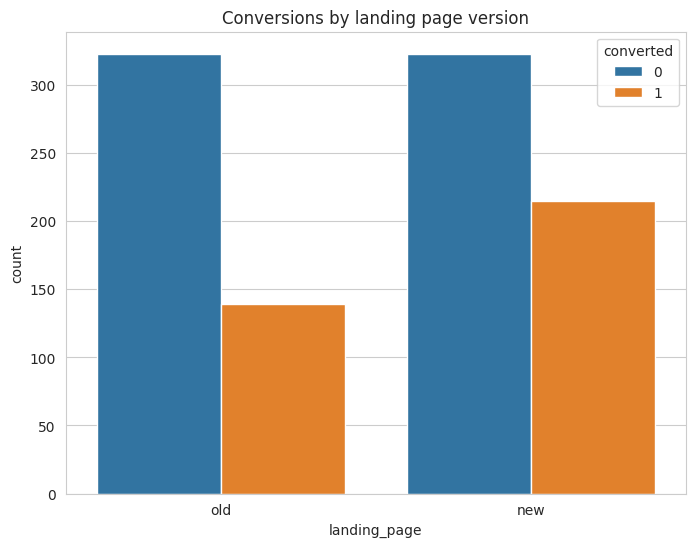

In [ ]:
# b) Create a barplot.
# Conversions by landing page version.
plt.figure(figsize=(8, 6))
sns.countplot(data=data,
              x='landing_page',
              hue='converted')

plt.title('Conversions by landing page version')
plt.show()

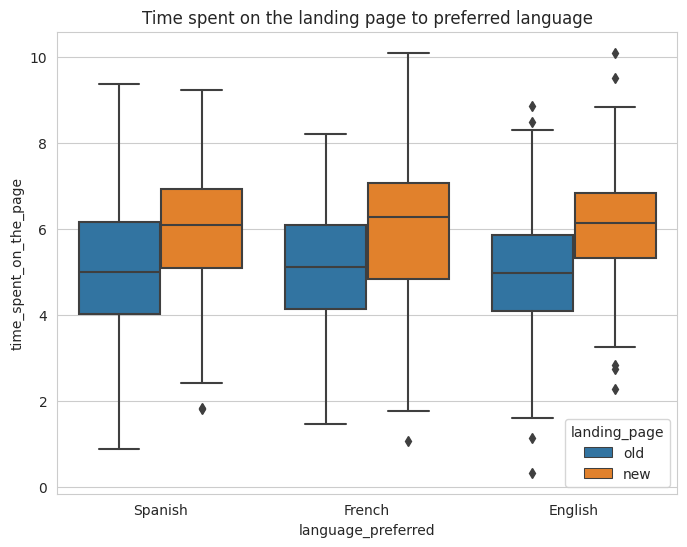

In [ ]:
# c) Create a boxplot.
# Time spent on the page to preferred language.
plt.figure(figsize=(8, 6))
sns.boxplot(data=data,
            x='language_preferred',
            y='time_spent_on_the_page',
            hue='landing_page')

plt.title('Time spent on the landing page to preferred language')
plt.show()

Formulate the hypotheses as follows:
- $H_0$: There is **no difference** in time spent between the old website and the new website.
- $H_1$: There is a **significant difference** in time spent between the old website and the new website.


In [ ]:
# Import the ttest_ind function from the scipy.stats module.
from scipy.stats import ttest_ind

# Specify the control and treatment groups.
control_group = data[data['group'] == 'control']
treatment_group = data[data['group'] == 'treatment']

# T-test for time spent on the page.
t_stat_time, p_val_time = ttest_ind(control_group['time_spent_on_the_page'],
                                    treatment_group['time_spent_on_the_page'])

# Display the results.
print("T-statistic:", t_stat_time)
print("P-value:", p_val_time)
print("Proportion of control group:", prop_control)
print("Proportion of treatment group:", prop_treatment)


T-statistic: -10.96365504694956
P-value: 1.7282901138602426e-26
Proportion of control group: 0.3008658008658009
Proportion of treatment group: 0.3996282527881041
